# Project: Wrangling and Analyze Data

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import tweepy
import math
import json
from timeit import default_timer as timer
from bs4 import BeautifulSoup

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#Downloaded the csv file and uploaded it to Jupyter
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

if response.status_code == 200:
    with open("image_predictions.tsv", "wb") as file:
        file.write(response.content)
    print('File "image_predictions.tsv" downloaded')
else:
    print('Downloading failed')

image_predictions = pd.read_csv("image_predictions.tsv", sep="\t")

File "image_predictions.tsv" downloaded


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
#This code is written by the student to download the tweet_json.txt programmatically
response = requests.get("https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt")

if response.status_code == 200:
    with open("tweet_json.txt", "wb") as file:
        file.write(response.content)
    print('File "tweet_json.txt" downloaded')
else:
    print('Downloading failed')
    
tweet_json = pd.read_json("tweet_json.txt", lines = True)
tweet_json.drop(["contributors", "coordinates", "created_at", "display_text_range",
                 "entities", "extended_entities", "geo", "id_str", "in_reply_to_screen_name",
                 "in_reply_to_status_id_str", "in_reply_to_user_id_str",
                 "is_quote_status", "lang", "place", "possibly_sensitive_appealable",
                 "possibly_sensitive", "quoted_status_id", "quoted_status_id_str", "retweeted",
                 "truncated", "user", "source", "favorited", "full_text"], inplace = True, axis = 1)


File "tweet_json.txt" downloaded


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
#Overview of the twitter_archive DataFrame
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [6]:
#Overview of the image_predictions DataFrame
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
#Overview of the tweet_json DataFrame
tweet_json.head()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,retweeted_status,quoted_status
0,892420643555336193,NaN,NaN,8853,39467,NaN,NaN
1,892177421306343426,NaN,NaN,6514,33819,NaN,NaN
2,891815181378084864,NaN,NaN,4328,25461,NaN,NaN
3,891689557279858688,NaN,NaN,8964,42908,NaN,NaN
4,891327558926688256,NaN,NaN,9774,41048,NaN,NaN


In [8]:
#Due to there being "None" instead of the regular NaN in twitter_archive
#We will replace them to make our assesment easier
twitter_archive = twitter_archive.replace("None", np.nan)

In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [10]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2354 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   retweet_count          2354 non-null   int64  
 4   favorite_count         2354 non-null   int64  
 5   retweeted_status       179 non-null    object 
 6   quoted_status          28 non-null     object 
dtypes: float64(2), int64(3), object(2)
memory usage: 128.9+ KB


In [12]:
twitter_archive.duplicated().sum()

np.int64(0)

In [13]:
image_predictions.duplicated().sum()

np.int64(0)

In [14]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                           745
doggo                         2259
floofer                       2346
pupper                        2099
puppo                         2326
dtype: int64

In [15]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [16]:
tweet_json.isnull().sum()

id                          0
in_reply_to_status_id    2276
in_reply_to_user_id      2276
retweet_count               0
favorite_count              0
retweeted_status         2175
quoted_status            2326
dtype: int64

In [17]:
#O means object
twitter_archive["timestamp"].dtype

dtype('O')

In [18]:
deleted_tweets_ids = twitter_archive.loc[~(twitter_archive["tweet_id"].isin(tweet_json["id"])), "tweet_id"]
print(f"There are {len(deleted_tweets_ids)} deleted tweets")

There are 2 deleted tweets


In [19]:
non_original_tweets_ids =  tweet_json.loc[
        tweet_json["retweeted_status"].notna() |
        tweet_json["quoted_status"].notna() |
        tweet_json["in_reply_to_status_id"].notna() |
        tweet_json["in_reply_to_user_id"].notna(), "id"]
print(f"There are {len(non_original_tweets_ids)} non original tweets")

There are 285 non original tweets


In [20]:
missing_category_tweets_ids = twitter_archive.loc[twitter_archive["doggo"].isna() &
                   twitter_archive["floofer"].isna() &
                   twitter_archive["puppo"].isna() &
                   twitter_archive["pupper"].isna(), "tweet_id"]

print(f"There are {len(missing_category_tweets_ids)} missing_categories")

There are 1976 missing_categories


In [21]:
non_dog_tweets_ids = image_predictions.loc[(image_predictions["p1_dog"] == False) 
                                                & (image_predictions["p2_dog"] == False) 
                                                & (image_predictions["p3_dog"] == False), "tweet_id"]
print(f"There are {len(non_dog_tweets_ids)} non dog tweets")

There are 324 non dog tweets


### Quality issues
1. Timestamp is an object in twitter_archive

2. 2 tweets in twitter_archive were deleted from twitter 

3. 285 non-original tweets are present in tweet_json

4. Non dog images of tweets (for example: hen or turtle) in image_predictions

5. dog breed names starting letter is a mix of uppercase and lowercase letters in (p1, p2, p3) of image_predictions 

6. <a.> tag in the source source of twitter_archive

7. Most links at the end of text in twitter_archive are corrupt

8. Missing category (doggo, pupper, puppo, floofer) in twitter_archive  
 

### Tidiness issues
1. There are 3 variables for 1 in twitter_archive (floofer, pupper, puppo) (doggo not in the list because it's present with those categories sometimes)

2. The tweet_json and twitter_archive shouldn't be in seperate tables

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

In [22]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

In [23]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

### Issue #1: Timestamp is an object in twitter_archive

#### Define: Change it to a datetime type with to_datetime()

#### Code

In [24]:
twitter_archive_clean["timestamp"] = pd.to_datetime(twitter_archive_clean["timestamp"])

#### Test

In [25]:
#<M8[ns] means datetime64[ns]
twitter_archive_clean["timestamp"].dtype

datetime64[ns, UTC]

In [26]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2: 2 tweets in twitter_archive were deleted from twitter

#### Define: Delete tweets with these ids from all dataframes

#### Code

In [27]:
def delete_rows(df, ids, column):
    df.drop(df[df[column].isin(ids)].index.values, axis = 0, inplace = True)
    df.reset_index(inplace = True, drop = True)

In [28]:
#Deleting these tweets from tweets_archive_clean and reseting index
delete_rows(twitter_archive_clean, deleted_tweets_ids, "tweet_id")

#Deleting these tweets from image_predictions_clean and reseting index
delete_rows(image_predictions_clean, deleted_tweets_ids, "tweet_id")

#### Test

In [29]:
print(f'There are {len(twitter_archive_clean[twitter_archive_clean["tweet_id"].isin(deleted_tweets_ids)].index.values)} deleted tweets in twitter_archive_clean')
print(f'There are {len(image_predictions_clean[image_predictions_clean["tweet_id"].isin(deleted_tweets_ids)].index.values)} deleted tweets in image_predictions_clean')

There are 0 deleted tweets in twitter_archive_clean
There are 0 deleted tweets in image_predictions_clean


In [30]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2354 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2354 non-null   datetime64[ns, UTC]
 4   source                      2354 non-null   object             
 5   text                        2354 non-null   object             
 6   retweeted_status_id         179 non-null    float64            
 7   retweeted_status_user_id    179 non-null    float64            
 8   retweeted_status_timestamp  179 non-null    object             
 9   expanded_urls               2295 non-null   object             
 10  rating_numerator            2354 non-null   int64           

In [31]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2073 non-null   int64  
 1   jpg_url   2073 non-null   object 
 2   img_num   2073 non-null   int64  
 3   p1        2073 non-null   object 
 4   p1_conf   2073 non-null   float64
 5   p1_dog    2073 non-null   bool   
 6   p2        2073 non-null   object 
 7   p2_conf   2073 non-null   float64
 8   p2_dog    2073 non-null   bool   
 9   p3        2073 non-null   object 
 10  p3_conf   2073 non-null   float64
 11  p3_dog    2073 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


### Issue #3: 285 non-original tweets are present in tweet_json

#### Define: Delete tweets with these ids from all dataframes

#### Code

In [32]:
#Deleting these tweets from tweets_archive_clean and reseting index
delete_rows(twitter_archive_clean, non_original_tweets_ids, "tweet_id")

#Deleting these tweets from image_predictions_clean and reseting index
delete_rows(image_predictions_clean, non_original_tweets_ids, "tweet_id")

#Deleting these tweets from tweets_json and reseting index
delete_rows(tweet_json_clean, non_original_tweets_ids, "id")

#### Test

In [33]:
print(f'There are {len(twitter_archive_clean[twitter_archive_clean["tweet_id"].isin(non_original_tweets_ids)].index.values)} deleted tweets in twitter_archive_clean')
print(f'There are {len(image_predictions_clean[image_predictions_clean["tweet_id"].isin(non_original_tweets_ids)].index.values)} deleted tweets in image_predictions_clean')
print(f'There are {len(tweet_json_clean[tweet_json_clean["id"].isin(non_original_tweets_ids)].index.values)} deleted tweets in tweet_json_clean')

There are 0 deleted tweets in twitter_archive_clean
There are 0 deleted tweets in image_predictions_clean
There are 0 deleted tweets in tweet_json_clean


In [34]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069 entries, 0 to 2068
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2069 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2069 non-null   datetime64[ns, UTC]
 4   source                      2069 non-null   object             
 5   text                        2069 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2066 non-null   object             
 10  rating_numerator            2069 non-null   int64           

In [35]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   int64  
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
 6   p2        1971 non-null   object 
 7   p2_conf   1971 non-null   float64
 8   p2_dog    1971 non-null   bool   
 9   p3        1971 non-null   object 
 10  p3_conf   1971 non-null   float64
 11  p3_dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 144.5+ KB


In [36]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069 entries, 0 to 2068
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2069 non-null   int64  
 1   in_reply_to_status_id  0 non-null      float64
 2   in_reply_to_user_id    0 non-null      float64
 3   retweet_count          2069 non-null   int64  
 4   favorite_count         2069 non-null   int64  
 5   retweeted_status       0 non-null      object 
 6   quoted_status          0 non-null      object 
dtypes: float64(2), int64(3), object(2)
memory usage: 113.3+ KB


### Issue #4: Non dog images of tweets (for example: hen or turtle) in image_predictions

#### Define: Set the  pupper of these tweets to "Not a dog"

#### Code

In [37]:
twitter_archive_clean.loc[(twitter_archive_clean["tweet_id"].isin(non_dog_tweets_ids)) & 
                          (twitter_archive_clean["tweet_id"].isin(twitter_archive_clean.loc[twitter_archive_clean["doggo"].isna() &
                   twitter_archive_clean["floofer"].isna() &
                   twitter_archive_clean["puppo"].isna() &
                   twitter_archive_clean["pupper"].isna(), "tweet_id"])), "pupper"] = "Not a dog"

#### Test

In [38]:
twitter_archive_clean[twitter_archive_clean["tweet_id"].isin(non_dog_tweets_ids)].pupper

0       Not a dog
21      Not a dog
27      Not a dog
50      Not a dog
51      Not a dog
          ...    
2043    Not a dog
2047    Not a dog
2050    Not a dog
2051    Not a dog
2062    Not a dog
Name: pupper, Length: 305, dtype: object

### Issue #5: dog breed names starting letter is a mix of uppercase and lowercase letters in (p1, p2, p3) of image_predictions &  _  rather than spaces

#### Define: replace "_" with " " and use upper on all

#### Code

In [39]:
image_predictions_clean[["p1", "p2", "p3"]] = image_predictions_clean[["p1", "p2", "p3"]].apply(lambda x: x.str.replace("_", " ").str.title())

#### Test

In [40]:
image_predictions_clean[["p1", "p2", "p3"]]

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman
...,...,...,...
1966,Basset,English Springer,German Short-Haired Pointer
1967,Paper Towel,Labrador Retriever,Spatula
1968,Chihuahua,Malamute,Kelpie
1969,Chihuahua,Pekinese,Papillon


### Issue #6: Remove <a.> tag from source in twitter_archive

#### Define: Use beautifulsoup to extract text

#### Code

In [41]:
twitter_archive_clean["source"] = twitter_archive_clean["source"].apply(lambda x: BeautifulSoup(x, "html.parser").text)

#### Test

In [42]:
twitter_archive_clean.source

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2064    Twitter for iPhone
2065    Twitter for iPhone
2066    Twitter for iPhone
2067    Twitter for iPhone
2068    Twitter for iPhone
Name: source, Length: 2069, dtype: object

### Issue #7: Most links at the end of text in twitter_archive are corrupt

#### Define: Delete the links from the end of the text

#### Code

In [43]:
twitter_archive_clean["text"] = twitter_archive_clean["text"].replace("https?://t\.co/\S+", "", regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_4480\4213602873.py:1: SyntaxWarning: invalid escape sequence '\.'
  twitter_archive_clean["text"] = twitter_archive_clean["text"].replace("https?://t\.co/\S+", "", regex=True)


#### Test

In [44]:
twitter_archive_clean.iloc[0].text

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 "

### Issue #8: Missing category (doggo, pupper, puppo, floofer) in twitter_archive

#### Define: Make a function to assume the category based on the dog type in image_predictions

#### Code

In [45]:
#makes a set and enters each dog's breed if it's a breed
missing_category_breeds = image_predictions_clean[image_predictions_clean["tweet_id"].isin(missing_category_tweets_ids)]
dog_breeds = set()
for index in missing_category_breeds.index:
    for i in range(1,4):
        if missing_category_breeds.loc[index, f"p{i}_dog"] == True:
            dog_breeds.add(missing_category_breeds.loc[index, f"p{i}"])
dog_breeds

{'Affenpinscher',
 'Afghan Hound',
 'Airedale',
 'American Staffordshire Terrier',
 'Appenzeller',
 'Australian Terrier',
 'Basenji',
 'Basset',
 'Beagle',
 'Bedlington Terrier',
 'Bernese Mountain Dog',
 'Black-And-Tan Coonhound',
 'Blenheim Spaniel',
 'Bloodhound',
 'Bluetick',
 'Border Collie',
 'Border Terrier',
 'Borzoi',
 'Boston Bull',
 'Bouvier Des Flandres',
 'Boxer',
 'Brabancon Griffon',
 'Briard',
 'Brittany Spaniel',
 'Bull Mastiff',
 'Cairn',
 'Cardigan',
 'Chesapeake Bay Retriever',
 'Chihuahua',
 'Chow',
 'Clumber',
 'Cocker Spaniel',
 'Collie',
 'Curly-Coated Retriever',
 'Dalmatian',
 'Dandie Dinmont',
 'Doberman',
 'English Foxhound',
 'English Setter',
 'English Springer',
 'Entlebucher',
 'Eskimo Dog',
 'Flat-Coated Retriever',
 'French Bulldog',
 'German Shepherd',
 'German Short-Haired Pointer',
 'Giant Schnauzer',
 'Golden Retriever',
 'Gordon Setter',
 'Great Dane',
 'Great Pyrenees',
 'Greater Swiss Mountain Dog',
 'Groenendael',
 'Ibizan Hound',
 'Irish Sette

In [46]:
DoggoLingo = {
    "Affenpinscher": "pupper",
    "Afghan Hound": "doggo",
    "Airedale": "doggo",
    "American Staffordshire Terrier": "doggo",
    "Appenzeller": "doggo",
    "Australian Terrier": "pupper",
    "Basenji": "pupper",
    "Basset": "doggo",
    "Beagle": "pupper",
    "Bedlington Terrier": "pupper",
    "Bernese Mountain Dog": ["doggo", "floofer"],
    "Black-And-Tan Coonhound": "doggo",
    "Blenheim Spaniel": "pupper",
    "Bloodhound": "doggo",
    "Bluetick": "doggo",
    "Border Collie": "doggo",
    "Border Terrier": "pupper",
    "Borzoi": ["doggo", "floofer"],
    "Boston Bull": "pupper",
    "Bouvier Des Flandres": ["doggo", "floofer"],
    "Boxer": "doggo",
    "Brabancon Griffon": "pupper",
    "Briard": ["doggo", "floofer"],
    "Brittany Spaniel": "doggo",
    "Bull Mastiff": "doggo",
    "Cairn": "pupper",
    "Cardigan": "pupper",
    "Chesapeake Bay Retriever": "doggo",
    "Chihuahua": "pupper",
    "Chow": ["doggo", "floofer"],
    "Clumber": ["doggo", "floofer"],
    "Cocker Spaniel": "pupper",
    "Collie": "doggo",
    "Curly-Coated Retriever": "doggo",
    "Dalmatian": "doggo",
    "Dandie Dinmont": "pupper",
    "Doberman": "doggo",
    "English Foxhound": "doggo",
    "English Setter": "doggo",
    "English Springer": "doggo",
    "Entlebucher": "doggo",
    "Eskimo Dog": ["doggo", "floofer"],
    "Flat-Coated Retriever": "doggo",
    "French Bulldog": "pupper",
    "German Shepherd": "doggo",
    "German Short-Haired Pointer": "doggo",
    "Giant Schnauzer": ["doggo", "floofer"],
    "Golden Retriever": "doggo",
    "Gordon Setter": "doggo",
    "Great Dane": "doggo",
    "Great Pyrenees": ["doggo", "floofer"],
    "Greater Swiss Mountain Dog": "doggo",
    "Groenendael": "doggo",
    "Ibizan Hound": "doggo",
    "Irish Setter": "doggo",
    "Irish Terrier": "pupper",
    "Irish Water Spaniel": ["doggo", "floofer"],
    "Irish Wolfhound": ["doggo", "floofer"],
    "Italian Greyhound": "pupper",
    "Japanese Spaniel": "pupper",
    "Keeshond": ["doggo", "floofer"],
    "Kelpie": "doggo",
    "Kerry Blue Terrier": "pupper",
    "Komondor": ["doggo", "floofer"],
    "Kuvasz": ["doggo", "floofer"],
    "Labrador Retriever": "doggo",
    "Lakeland Terrier": "pupper",
    "Leonberg": ["doggo", "floofer"],
    "Lhasa": "pupper",
    "Malamute": ["doggo", "floofer"],
    "Malinois": "doggo",
    "Maltese Dog": "pupper",
    "Mexican Hairless": "pupper",
    "Miniature Pinscher": "pupper",
    "Miniature Poodle": "pupper",
    "Miniature Schnauzer": "pupper",
    "Newfoundland": ["doggo", "floofer"],
    "Norfolk Terrier": "pupper",
    "Norwegian Elkhound": "doggo",
    "Norwich Terrier": "pupper",
    "Old English Sheepdog": ["doggo", "floofer"],
    "Otterhound": "doggo",
    "Papillon": "pupper",
    "Pekinese": "pupper",
    "Pembroke": "pupper",
    "Pomeranian": "floofer",
    "Pug": "pupper",
    "Redbone": "doggo",
    "Rhodesian Ridgeback": "doggo",
    "Rottweiler": "doggo",
    "Saint Bernard": ["doggo", "floofer"],
    "Saluki": "doggo",
    "Samoyed": ["doggo", "floofer"],
    "Schipperke": "pupper",
    "Scotch Terrier": "pupper",
    "Scottish Deerhound": ["doggo", "floofer"],
    "Sealyham Terrier": "pupper",
    "Shetland Sheepdog": ["doggo", "floofer"],
    "Shih-Tzu": "pupper",
    "Siberian Husky": "doggo",
    "Silky Terrier": "pupper",
    "Soft-Coated Wheaten Terrier": ["doggo", "floofer"],
    "Staffordshire Bullterrier": "doggo",
    "Standard Poodle": ["doggo", "floofer"],
    "Standard Schnauzer": "doggo",
    "Sussex Spaniel": "doggo",
    "Tibetan Mastiff": ["doggo", "floofer"],
    "Tibetan Terrier": ["doggo", "floofer"],
    "Toy Poodle": "pupper",
    "Toy Terrier": "pupper",
    "Vizsla": "doggo",
    "Walker Hound": "doggo",
    "Weimaraner": "doggo",
    "Welsh Springer Spaniel": "doggo",
    "West Highland White Terrier": "pupper",
    "Whippet": "doggo",
    "Wire-Haired Fox Terrier": "pupper",
    "Yorkshire Terrier": "pupper"
}
deleted_before = 0
no_image = 0
updated = 0

for tweet_id in missing_category_tweets_ids.values:
    prediction = image_predictions_clean[image_predictions_clean["tweet_id"] == tweet_id]
    if prediction.empty:
        if twitter_archive_clean[twitter_archive_clean["tweet_id"] == tweet_id].empty:
            deleted_before += 1
        else:
            no_image += 1
        continue
    else:
        for column in ["p1", "p2", "p3"]:
            breed = str(prediction[column].values[0])
            if breed in DoggoLingo:
                if isinstance(DoggoLingo[breed], str):
                    twitter_archive_clean.loc[twitter_archive_clean["tweet_id"] == tweet_id, DoggoLingo[breed]] = DoggoLingo[breed]
                    updated += 1
                    break
                else:
                    for category in DoggoLingo[breed]:
                        twitter_archive_clean.loc[twitter_archive_clean["tweet_id"] == tweet_id, category] = category
                    updated += 1
                    break
            else:
                continue
print(f"{deleted_before} tweets were deleted before")
print(f"{no_image} tweets had no images")
print(f"{updated} categories were updated succesfully")

238 tweets were deleted before
70 tweets had no images
1410 categories were updated succesfully


In [47]:
#sets pupper to no image in the rows with no images
twitter_archive_clean.loc[twitter_archive_clean["doggo"].isna() &
                   twitter_archive_clean["floofer"].isna() &
                   twitter_archive_clean["puppo"].isna() &
                   twitter_archive_clean["pupper"].isna(), "pupper"] = "No image"

#### Test

In [48]:
len(twitter_archive_clean.loc[twitter_archive_clean["doggo"].isna() &
                   twitter_archive_clean["floofer"].isna() &
                   twitter_archive_clean["puppo"].isna() &
                   twitter_archive_clean["pupper"].isna(), "tweet_id"])

0

### Issue #9: There are 3 variables for 1 in twitter_archive (floofer, pupper, puppo) (doggo not in the list because it's present with those categories sometimes)

#### Define: melt the columns into one and make doggo a boolean

#### Code

In [49]:
twitter_archive_clean = pd.melt(twitter_archive_clean ,id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo'], var_name = 'categories', value_name = "category")

In [50]:
twitter_archive_clean["doggo"] = twitter_archive_clean["doggo"].apply(lambda x: pd.notna(x))

In [51]:
corrected_missing = 0
for index in twitter_archive_clean.index.values:
    duplicated_rows = twitter_archive_clean[twitter_archive_clean["tweet_id"] == twitter_archive_clean.loc[index, "tweet_id"]]
    NaN_count = 0
    for index, row in duplicated_rows.iterrows():
        if pd.isna(row["category"]) and row["doggo"] == True:
            continue
        else:
            NaN_count += 1
    
    if NaN_count == 0:
        twitter_archive_clean.loc[index, "category"] = "doggo"
        corrected_missing += 1
    else:
        continue

print(f"Added 'doggo' to {corrected_missing} rows")

Added 'doggo' to 613 rows


In [52]:
twitter_archive_clean.drop("categories", axis = 1, inplace = True)
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean["category"].isna()].index.values, axis = 0, inplace = True)
twitter_archive_clean.reset_index(drop = True, inplace = True)

#### Test

In [53]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069 entries, 0 to 2068
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2069 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2069 non-null   datetime64[ns, UTC]
 4   source                      2069 non-null   object             
 5   text                        2069 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2066 non-null   object             
 10  rating_numerator            2069 non-null   int64           

In [54]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,category
0,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,False,floofer
1,890006608113172480,NaN,NaN,2017-07-26 00:31:25+00:00,Twitter for iPhone,This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,True,floofer
2,887101392804085760,NaN,NaN,2017-07-18 00:07:08+00:00,Twitter for iPhone,This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,NaN,True,floofer
3,886736880519319552,NaN,NaN,2017-07-16 23:58:41+00:00,Twitter for iPhone,This is Mingus. He's a wonderful father to his...,NaN,NaN,NaN,"https://www.gofundme.com/mingusneedsus,https:/...",13,10,Mingus,True,floofer
4,885167619883638784,NaN,NaN,2017-07-12 16:03:00+00:00,Twitter for iPhone,Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,NaN,True,floofer


In [55]:
twitter_archive_clean[twitter_archive_clean["tweet_id"].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,category


### Issue #10: The tweet_json and twitter_archive shouldn't be in seperate tables

#### Define: Merge the 2 dataframes on tweet_id

#### Code

In [56]:
twitter_archive_clean.columns.values

array(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'category'], dtype=object)

In [57]:
#drop rows repeated in twitter_archive_clean except tweet_id
drop_columns = []
for column in twitter_archive_clean.columns.values:
    if column in tweet_json_clean.columns.values:
        drop_columns.append(column)
        
twitter_archive_clean.drop(drop_columns, axis = 1, inplace = True)

In [58]:
#change name of "id" in tweet_json_clean to "tweet_id"
tweet_json_clean = tweet_json_clean.rename(columns = {"id": "tweet_id"})
tweet_json_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,retweeted_status,quoted_status
0,892420643555336193,NaN,NaN,8853,39467,NaN,NaN
1,892177421306343426,NaN,NaN,6514,33819,NaN,NaN
2,891815181378084864,NaN,NaN,4328,25461,NaN,NaN
3,891689557279858688,NaN,NaN,8964,42908,NaN,NaN
4,891327558926688256,NaN,NaN,9774,41048,NaN,NaN


In [59]:
merged_twitter = twitter_archive_clean.merge(tweet_json_clean, how = "outer", on = "tweet_id")

#### Test

In [60]:
merged_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069 entries, 0 to 2068
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2069 non-null   int64              
 1   timestamp                   2069 non-null   datetime64[ns, UTC]
 2   source                      2069 non-null   object             
 3   text                        2069 non-null   object             
 4   retweeted_status_id         0 non-null      float64            
 5   retweeted_status_user_id    0 non-null      float64            
 6   retweeted_status_timestamp  0 non-null      object             
 7   expanded_urls               2066 non-null   object             
 8   rating_numerator            2069 non-null   int64              
 9   rating_denominator          2069 non-null   int64              
 10  name                        1493 non-null   object          

In [61]:
pd.set_option('display.max_columns', None)
merged_twitter.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,category,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,retweeted_status,quoted_status
0,666020888022790149,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,True,doggo,NaN,NaN,532,2535,NaN,NaN
1,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,True,doggo,NaN,NaN,48,132,NaN,NaN
2,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,True,doggo,NaN,NaN,47,128,NaN,NaN
3,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,True,doggo,NaN,NaN,147,311,NaN,NaN
4,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,False,pupper,NaN,NaN,41,111,NaN,NaN


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [62]:
master_dataset = merged_twitter.merge(image_predictions_clean, how = "outer", on = "tweet_id")
master_dataset.to_csv("master_dataset.csv", index = False)

In [63]:
#Drop columns that aren't useful
to_drop = []
for column in master_dataset.columns:
    if master_dataset[column].isna().all():
        to_drop.append(column)
master_dataset.drop(to_drop, axis = 1, inplace = True)

In [64]:
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069 entries, 0 to 2068
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2069 non-null   int64              
 1   timestamp           2069 non-null   datetime64[ns, UTC]
 2   source              2069 non-null   object             
 3   text                2069 non-null   object             
 4   expanded_urls       2066 non-null   object             
 5   rating_numerator    2069 non-null   int64              
 6   rating_denominator  2069 non-null   int64              
 7   name                1493 non-null   object             
 8   doggo               2069 non-null   bool               
 9   category            2069 non-null   object             
 10  retweet_count       2069 non-null   int64              
 11  favorite_count      2069 non-null   int64              
 12  jpg_url             1971 non-null 

In [65]:
master_dataset.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,category,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,True,doggo,532,2535,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,True,doggo,48,132,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,True,doggo,47,128,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,True,doggo,147,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,False,pupper,41,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insight #1: The best month for tweets

In [66]:
master_dataset["month"] = master_dataset["timestamp"].dt.month

June (6) has the highest average favorites (15981)


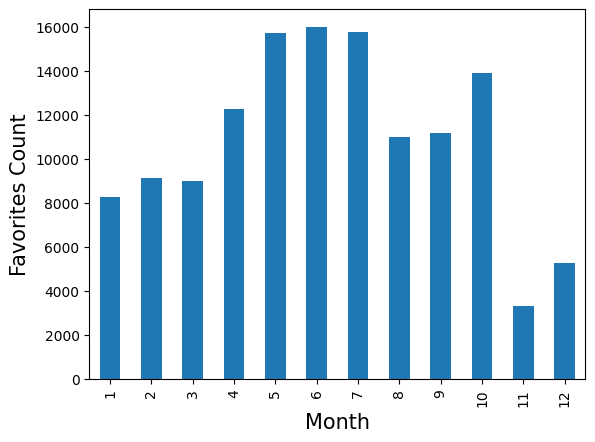

In [67]:
month_favorite_average = master_dataset.groupby("month")["favorite_count"].mean()
month_favorite_average.plot(kind = "bar");
plt.xlabel("Month", fontdict={"fontsize": 15})
plt.ylabel("Favorites Count", fontdict={"fontsize": 15})
print(f"June (6) has the highest average favorites ({math.ceil(sorted(month_favorite_average)[-1])})")

June has the highest average retweets (4972)


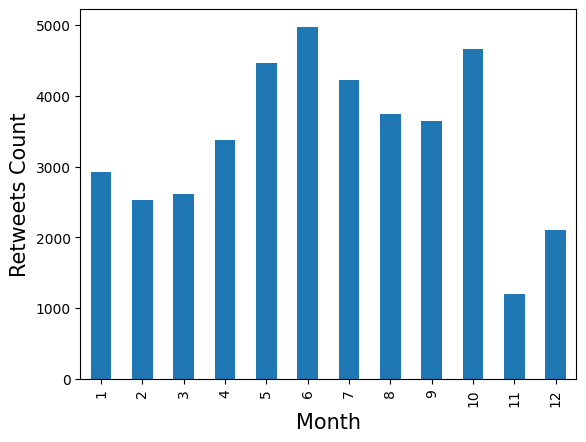

In [68]:
month_retweet_average = master_dataset.groupby("month")["retweet_count"].mean()
month_retweet_average.plot(kind = "bar");
plt.xlabel("Month", fontdict={"fontsize": 15})
plt.ylabel("Retweets Count", fontdict={"fontsize": 15})
print(f"June has the highest average retweets ({math.ceil(sorted(month_retweet_average)[-1])})")

### Insight #2: The best category for tweets

Puppies (puppo) has the highest average favorites (22716)


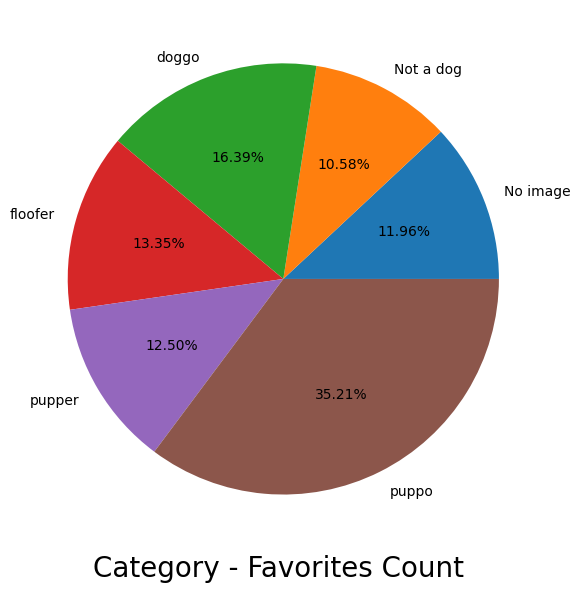

In [69]:
category_favorite_average = master_dataset.groupby("category")["favorite_count"].mean()
category_favorite_average.plot(kind = "pie", figsize = (7, 7), autopct = "%1.2f%%");
plt.xlabel("Category - Favorites Count ", fontdict={"fontsize": 20})
plt.ylabel("", fontdict={"fontsize": 15})
print(f"Puppies (puppo) has the highest average favorites ({math.ceil(sorted(category_favorite_average)[-1])})")

Puppies (puppo) has the highest average retweets (7125)


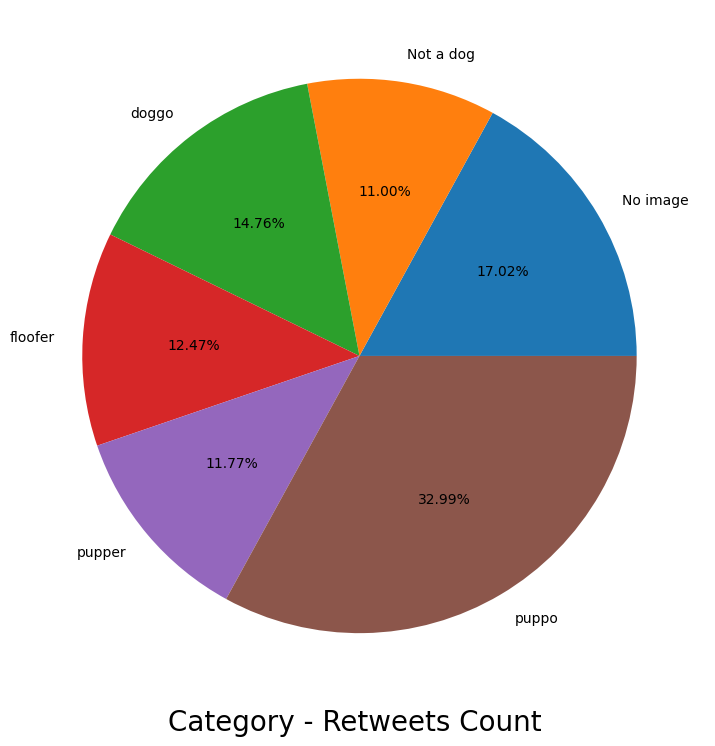

In [70]:
category_retweet_average = master_dataset.groupby("category")["retweet_count"].mean()
category_retweet_average.plot(kind = "pie", figsize = (9, 9), autopct = "%1.2f%%");
plt.xlabel("Category - Retweets Count ", fontdict={"fontsize": 20})
plt.ylabel("", fontdict={"fontsize": 15})
print(f"Puppies (puppo) has the highest average retweets ({math.ceil(sorted(category_retweet_average)[-1])})")

### Insight #3: The dog breed with highest average rating

In [71]:
master_dataset["probable_breed"] = master_dataset["category"]
master_dataset["rating_percentage"] = master_dataset["rating_numerator"] / master_dataset["rating_denominator"] * 100  
for index, row in master_dataset.iterrows():
    if row["p1_dog"] == True:
        master_dataset.loc[index, "probable_breed"] = row["p1"]
    elif row["p2_dog"] == True:
        master_dataset.loc[index, "probable_breed"] = row["p2"]
    elif row["p3_dog"] == True:
        master_dataset.loc[index, "probable_breed"] = row["p3"]
    else:
        continue

probable_breed
Gordon Setter           117.500000
Silky Terrier           120.000000
Standard Schnauzer      120.000000
Border Terrier          121.428571
Tibetan Mastiff         122.500000
Briard                  123.333333
Saluki                  125.000000
Pomeranian              125.365854
Bouvier Des Flandres    130.000000
Clumber                 270.000000
Name: rating_percentage, dtype: float64

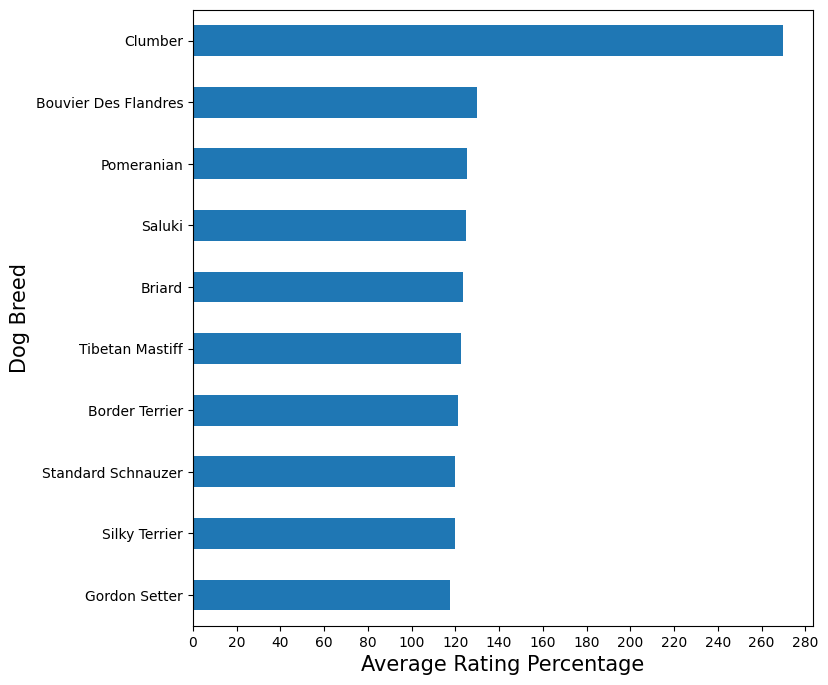

In [72]:
top_10_ratings_average = master_dataset[(master_dataset["probable_breed"] != "Not a dog") &
                                       (master_dataset["probable_breed"] != "puppo")].groupby("probable_breed")["rating_percentage"].mean().sort_values().tail(10)
top_10_ratings_average.plot(kind = "barh", figsize = (8, 8))
plt.xticks(np.arange(0, 300, 20))
plt.xlabel("Average Rating Percentage", fontdict={"fontsize": 15})
plt.ylabel("Dog Breed", fontdict={"fontsize": 15})
top_10_ratings_average

### Insights:
1. The best month for tweets is 6 "June" as it has the highest average of retweets_count & favorited_count from all the months across 3 years <br>

2. The best category of dogs to tweet are puppies "puppo" as they get the highest average of retweet_count & favorite_count

3. The breed with the highest average rating percentage is the "Clumber" breed. 